In [11]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
%pylab inline
from astropy.table import Table
import pyfits as fits
import numpy as np

from os.path import expanduser
home = expanduser("~")
import csv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [49]:
file_nm = '/Users/Chris/Desktop/green_gradeA_lenses.csv'


In [78]:
name = np.chararray((61,),itemsize = 30)
ra = np.zeros((61,), dtype = 'float32')
dec = np.zeros((61,), dtype = 'float32')
with open(file_nm, 'rb') as csvfile:
    cat = csv.reader(csvfile, dialect='excel')
    for i, row in enumerate(cat):
        if (row[0]!= '') and (i!=0):
            name[i-1] = row[0]
            ra[i-1] = row[1]
            dec[i-1] = row[2]

In [79]:
print ra

[ 169.14399719   39.4193306   355.70285034  167.61296082   18.25239563
  134.08996582  175.47796631  188.61662292  196.55690002   36.29600525
    2.01231003  132.57945251  235.3273468   144.00318909  231.93759155
   34.21892929  249.31072998  192.89877319   34.75894165  210.87286377
  143.93305969  230.53974915  257.412323    175.87348938  149.87887573
   29.49556923  247.95970154   34.40492249  183.76849365  333.35906982
  138.02212524  150.41716003  136.03320312   33.54670334  179.93595886
   26.73336983   11.01208019   33.35216522  240.30531311  146.11445618
  345.89654541   35.99141693   38.21485901  335.45343018  199.66386414
  133.91712952  331.62246704  148.83216858  150.20527649  150.05250549
  321.29446411   33.19929123  330.87097168  199.62246704   36.54444885
    7.28240013  133.36549377  146.73617554   43.1883812   259.89233398
  320.71682739]


In [51]:
import urllib
file_num = 0
testfile = urllib.URLopener()
for ra, dec in zip(ra,dec):
#     url specifies ra/dec as well as size (101), pixscale (0.262 is native) and layer (decals-dr5)
    url = 'http://legacysurvey.org/viewer/fits-cutout?ra={}&dec={}&size=101&layer=decals-dr5&pixscale=0.262&bands=grz'.format(ra, dec)
    testfile.retrieve(url, '/Users/Chris/Desktop/Training_Set/Lenses/cutout_{}.fits'.format(file_num))
    file_num+=1


In [67]:
test_im = fits.getdata('/Users/Chris/Desktop/Training_Set/Lenses/cutout_0.fits')
test_im.shape

(3, 101, 101)

<function matplotlib.pyplot.imshow>

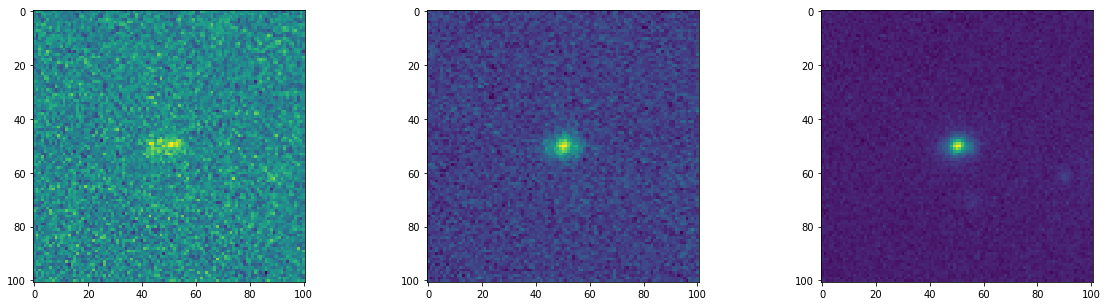

In [76]:
plt.figure(figsize = (20,5))
plt.subplot(131)
plt.imshow(test_im[0].T*20)
plt.subplot(132)
plt.imshow(test_im[1].T*20)
plt.subplot(133)
plt.imshow(test_im[2].T*20)
plt.imshow

In [82]:
ims = np.zeros((61, 3, 101, 101))
counter = 0

# Loads the images
for i, obj in enumerate(ra):
    ims[i] = fits.getdata('/Users/Chris/Desktop/Training_Set/Lenses/cutout_{}.fits'.format(i))

# Concatenate images to catalog
x = ims

print "Done !"

Done !


In [106]:
print x.shape

(61, 3, 101, 101)


In [107]:
# import h5py

# with h5py.File('catalog_lenses.hdf5', 'w') as hf:
#     hf.create_dataset('image data',  data = x)

In [108]:
# d = Table.read('/Users/Chris/Desktop/Training_Set/Catalogs/catalog_lenses.hdf5')